In [23]:
import numpy as np
import pandas as pd
import timeit
import time
import json
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import psycopg2
import sys, os
import pandas.io.sql as psql
import sqlalchemy
from sqlalchemy import create_engine

import string
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize

import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

#from dash_app.word_match import regex_matcher
#from dash_app.document import survey_doc
#from dash_app.embed import embeddings
#import dash_app.tri_training
from dash_app import predict_and_plot

import pickle
import dash_app.document

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
predictions, gt, class_prec = predict_and_plot.main()

['Co-workers/teamwork', 'Schedule', 'Management', 'Benefits and leave', 'Materials and resources', 'Customers', 'Pay', 'Recognition', 'Learning & Development', 'Purpose', 'Commmute', 'Staffing level', 'Communication', 'Quality of care', 'Employee relations', 'Facility/setting']
Index(['level_0', 'comment_idx', 'labels', 'index', 'QID', 'text',
       'Benefits and leave', 'Co-workers/teamwork', 'Commmute',
       'Communication', 'Customers', 'Employee relations', 'Facility/setting',
       'Learning & Development', 'Management', 'Materials and resources',
       'Pay', 'Purpose', 'Quality of care', 'Recognition', 'Schedule',
       'Staffing level'],
      dtype='object')
ground truth shape = (86359, 16)
predictions shape = (184433, 16)
predictions matching gt shape = (86359, 16)


/home/matt_valley/anaconda3/envs/spacy/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [12]:
predictions.head()

NameError: name 'predictions' is not defined

In [ ]:
print(com_ids)
sub_df = df.loc[com_ids]
print(len(sub_df), len(df))
print(sub_df)

In [ ]:
out_df.head()

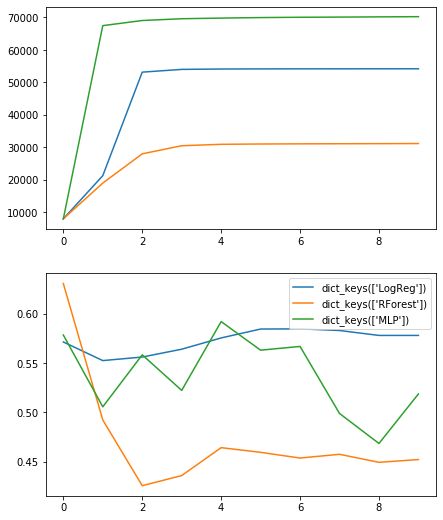

In [2]:

fig,ax = plt.subplots(2,1, figsize=(7,9))
fname = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/dash_app/tri_train_metrics_disagree_20200209-235945.pkl'
metrics = pickle.load(open(fname, 'rb'))
for m,model in enumerate(metrics):
    for metric,values in model.items():
        ax[0].plot(values['train_size'])
        ax[1].plot(values['prec'])
model_names = [m.keys() for m in metrics]
plt.legend(model_names)
plt.savefig('plot.png')

In [11]:
print(metrics)

[{'LogReg': {'acc': [0.1396, 0.2136, 0.2454, 0.256, 0.2546, 0.2542, 0.2488, 0.2472, 0.247, 0.2446], 'prec': [0.5855699658531738, 0.5667596637423432, 0.5402698555865432, 0.532923327015886, 0.5273526844466767, 0.5199524684916972, 0.4977914083436645, 0.4935728467555073, 0.4927094915733323, 0.4907358066251383], 'prec_all': [array([0.62857143, 0.6031941 , 0.36363636, 0.75291375, 0.        ,
       0.33333333, 0.54166667, 0.60820896, 0.11111111, 0.2962963 ,
       0.37142857, 0.51851852, 0.33333333, 0.14285714, 0.54216867]), array([0.47916667, 0.58923767, 0.4       , 0.70821842, 0.        ,
       0.        , 0.70588235, 0.59459459, 0.08333333, 0.29411765,
       0.46153846, 0.46666667, 0.375     , 0.5       , 0.54761905]), array([0.50909091, 0.58913413, 0.25      , 0.66204346, 0.        ,
       0.        , 0.6       , 0.5754717 , 0.11111111, 0.33333333,
       0.375     , 0.4       , 0.5       , 0.        , 0.55555556]), array([0.48333333, 0.58542714, 0.25      , 0.60252238, 0.        ,
  

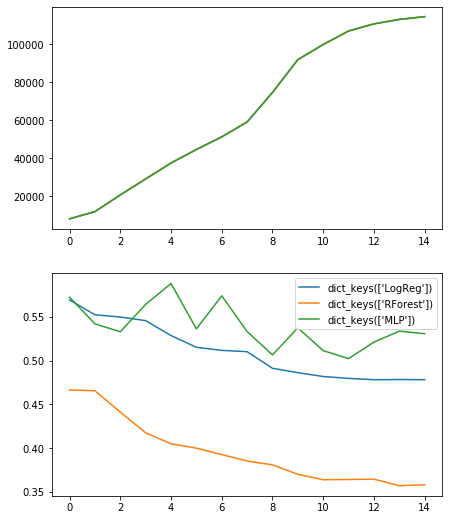

In [5]:
fig,ax = plt.subplots(2,1, figsize=(7,9))
fname = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/dash_app/tri_train_metrics_disagree_20200210-011448.pkl'
metrics = pickle.load(open(fname, 'rb'))
for m,model in enumerate(metrics):
    for metric,values in model.items():
        ax[0].plot(values['train_size'])
        ax[1].plot(values['prec'])
model_names = [m.keys() for m in metrics]
plt.legend(model_names)
plt.savefig('plot.png')

In [ ]:
tri_train_metrics_disagree_20200210-004029doc = document.survey_doc('/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/Labeled data and sentiments 2017-18 data_mtvedits.csv',
               header=0)
doc.clean_hand_labelled_data()


In [ ]:
df1 = pd.DataFrame({'a':[1,2,3], 'b':[2,3,4]})
df2 = pd.DataFrame({'c':[1,2,4]})
df3 = pd.DataFrame({'c':[1,2,4], 'e':[np.nan, 'trees', 'forest']})
df4 = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
df4.head()

In [ ]:
print(df3.keys())

In [2]:
y_path = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/regex_scores_20200206-204325.pkl'
ydf = pd.read_pickle(y_path)
#print(ydf.keys())
#ydf = ydf.rename(columns={'Commmute': 'Commute'})

ydf.head()
#temp = ydf[['labels', 'text']]
#temp.head(20)
#print(ydf.labels)
#labeled_data = survey_doc(y_path[0])
#labeled_data.clean_regex_labelled_data()
#l_df = labeled_data.df



,level_0,comment_idx,labels,index,QID,text,Benefits and leave,Co-workers/teamwork,Commute,Communication,...,Facility/setting,Learning & Development,Management,Materials and resources,Pay,Purpose,Quality of care,Recognition,Schedule,Staffing level
0,0,132197,"[Benefits and leave, Staffing level]",132197,One Change,Better health insurance benefits and coverage....,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,75053,[Management],75053,Unique / Unusual,the way that supervisors or management treats ...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,168847,[Co-workers/teamwork],168847,One Change,Nothing I feel that this is a great company an...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,18283,"[Co-workers/teamwork, Management, Customers, S...",18283,61,I think Silverado goes above more then most pl...,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,4,14549,[Pay],14549,61,Give workers raises appreciate when they are ...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
pickle_out = open(y_path, "wb")
pickle.dump(ydf, pickle_out)

In [ ]:
print(ydf.shape)

In [ ]:
print(ydf.keys())

In [ ]:
y = pd.read_csv('/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/Labeled data and sentiments 2017-18 data_mtvedits.csv',
                converters={"JK label": lambda x: x.strip("[]").split(", ")})

y = y.dropna(how='any')
y = y.rename(columns={'Comment': 'text'})
y = y[['QID', 'text', 'JK label', 'JK sentiment']]
y = y[y['text'].apply(lambda x: isinstance(x, str))]  # cut out non-string entries
#y = y[y['text'].apply(lambda x: self.filter_str_length(x))]
y = y[y['JK label'] != 'No answer/Nothing']
y.drop(['No answer/Nothing', 'Other'], axis=1)
#onehot = pd.get_dummies(y['JK label'].apply(pd.Series).stack()).sum(level=0)
#onehot.keys()
y.keys()

In [ ]:
y_path = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/regex_scored_df.pkl'
ydf = pd.read_pickle(y_path)

ydf.head()

In [ ]:
from dash_app.predict_and_plot import get_class_frequency
df = pd.read_pickle('/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/regex_scored_all_df.pkl')
classes, class_counts = get_class_frequency(df)
class_counts = [count/float(len(df)) for count in class_counts]
print(len(df))
df.head()

In [ ]:
from predict_and_plot import plot_class_frequency

plot_class_frequency(ydf)

In [ ]:
# load all data


paths = ['~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/2017 to mid 2018 comments.csv',
                 '~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/2018 to mid 2019 comments.csv']

q1_df = pd.DataFrame()
q2_df = pd.DataFrame()
for data_path in paths:
    data = survey_doc(data_path)
    data.clean_unlabelled_data()
    data_q1 = data.df[(data.df['QID']==61) | (data.df['QID']=='Unique / Unusual')]
    q1_df = q1_df.append(data_q1, ignore_index=True)
    data_q2 = data.df[(data.df['QID']==62) | (data.df['QID']=='One Change')]
    q2_df = q2_df.append(data_q2, ignore_index=True)

In [ ]:
q1_q2_df = q1_df.append(q2_df, ignore_index=True)
print(len(q1_q2_df))

In [9]:
df = pd.read_pickle('~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/dash_app/tri_train_predictions_disagree_20200206-162059.pkl')
df.head()

df = df.sort_values('comment_idx')
df = df.reset_index(drop=True)
print(df.keys())
com_ids = df.comment_idx.unique()
labels = []
idx = []
for id in com_ids:
    idx.append(id)
    com_df = df[df['comment_idx']==id]
    com_labs = com_df.labels.unique()
    labels.append(com_labs)
    
multilabel_df = pd.DataFrame()
multilabel_df['comment_idx'] = idx
multilabel_df['labels'] = labels

onehot = pd.get_dummies(multilabel_df.labels.apply(pd.Series).stack()).sum(level=0)

AttributeError: 'list' object has no attribute 'head'

In [ ]:
df.sum(axis=0)
print(len(df))
    

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:', echo=True)

In [ ]:
q1_q2_df.to_sql('unlabelled_data', engine)

In [ ]:
host_name = "matt-valley-insight-project-data.cubypj2k3lg1.us-west-2.rds.amazonaws.com"
user_name = "mtv2101"
password = "i0L27zWbGbhG"
database = 'matt-valley-insight-project-data'
port = 5432

engine = psycopg2.connect(
    database=database,
    user=user_name,
    password=password,
    host=host_name,
    port='5432'
)

In [ ]:
q1_q2_df.to_sql('unlabelled_data', engine)

In [ ]:
# load labelled data
data_path = ['~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/Labeled data and sentiments 2017-18 data2.csv']
labeled_data = survey_doc(data_path[0], header=0)
labeled_data.clean_labelled_data()


In [ ]:
labeled_data.df.head()

In [ ]:
survey_path_1 = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/2017 to mid 2018 comments.csv'
survey_path_2 = '/home/matt_valley/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/AI_survey_data/2018 to mid 2019 comments.csv'

df = pd.read_csv(survey_path_1, header=1)
df2 = pd.read_csv(survey_path_2, header=1)

print(len(df))
df = df.dropna(how='any')
df2 = df2.dropna(how='any')
print(len(df))

df = df.rename(columns={"Comment": "text"})
df2 = df2.rename(columns={"Comment": "text"})

text_clean = [len(t) for t in df.text.values]


# load spacy model

model = 'en_core_web_sm' # for testing on laptop
#model = 'en_core_web_lg'
#model = 'en_vectors_web_lg' # many more words
nlp = spacy.load(model)
#sentencizer = nlp.create_pipe("sentencizer")
#nlp.add_pipe(sentencizer)

In [ ]:
start_time = timeit.default_timer()

match = regex_matcher()
match_df = pd.DataFrame()
for t,text in enumerate(df['text']):
    doc = nlp(text)
    out_df = match.match_topics(t, doc)
    match_df = match_df.append(out_df)
    
match_df.reset_index(drop=True, inplace=True)

process_time = timeit.default_timer() - start_time
print(str(len(df)) + ' submissions, query took ' + str(process_time) + ' seconds')

In [ ]:
print(len(df))
print(len(match_df))
pd.to_pickle(match_df, '~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/match_df.pkl')

In [ ]:
match_df = pd.read_pickle('~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/match_df.pkl')

In [ ]:
match_df.keys()

In [ ]:
### LOAD EMBEDDING MODEL

model = 'en_vectors_web_lg'
nlp_vec = spacy.load(model)

y_vec = []
topics = match_df['topic'].unique()
for topic in topics:
    y_doc = nlp(topic)
    y_vec.append(y_doc.vector)

In [ ]:
y_vec = np.array(y_vec)
y_vec.shape

In [ ]:
# BUILD CONTEXT VECTORS

X = []
for n,text in enumerate(match_df['context_span'].values):
    X.append(nlp(text).vector)
X = np.array(X)
print(X.shape)

In [ ]:
# dimensionality reduce

pca = PCA(n_components=20, whiten=True, random_state=42)
pca.fit(X, y)

In [ ]:
plt.plot(pca.explained_variance_)

In [ ]:
'''
do tfidf
'''

all_tfidf = []
topics = match_df['topic'].unique()
for topic in topics:
    temp_df = match_df[match_df['topic']==topic]
    data = [sent for sent in temp_df.comment_text]
    
    n_features = 1000
    n_components = 12
    n_top_words = 8
    
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                       max_features=n_features,
                                       stop_words='english')

    t0 = time.time()
    tfidf = tfidf_vectorizer.fit_transform(data)

    feature_array = np.array(tfidf_vectorizer.get_feature_names())
    tfidf_sorting = np.argsort(tfidf.toarray()).flatten()[::-1]
    
    n = 10
    top_n = feature_array[tfidf_sorting][:n]
    print(topic)
    print(top_n)
        
    all_tfidf.append(tfidf)
    print("done in %0.3fs." % (time.time() - t0))


In [ ]:
from scipy.sparse import csr_matrix
X = np.empty((0,all_tfidf[0].shape[1]), dtype=all_tfidf[0].dtype)
y = np.empty((0))
for t,topic_vecs in enumerate(all_tfidf):
    print(topic_vecs.shape)
    print(X.shape)
    X = np.append(X,topic_vecs.toarray(), axis=0)
    y = np.append(y,np.ones(topic_vecs.shape[0])*t, axis=0)
print(X.shape)
print(y.shape)


In [ ]:
logit = LogisticRegression(class_weight='balanced', 
                           random_state=42, 
                           multi_class='multinomial',
                           verbose=1,
                           max_iter=1000)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logit.fit(X_train, y_train)
    y_pred = logit.predict((X_test))
    
    print('accuracy = ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('balenced accuracy = ' + str(metrics.balanced_accuracy_score(y_test, y_pred)))
    print('macro precision = ' + str(metrics.precision_score(y_logit.fit(X_train, y_train)

In [ ]:
y_pred = logit.predict((X_test))
print('accuracy = ' + str(metrics.accuracy_score(y_test, y_pred)))
print('balenced accuracy = ' + str(metrics.balanced_accuracy_score(y_test, y_pred)))
print('macro precision = ' + str(metrics.precision_score(y_test, y_pred,
                           average='macro')))
print('recall score = ' + str(metrics.recall_score(y_test, y_pred,
                           average='macro')))

In [ ]:
                               average='macro')))
    print('recall score = ' + str(metrics.recall_score(y_test, y_pred,
                               average='macro')))
    
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:

### view hand scored data

hs = pd.read_pickle('~/PycharmProjects/insight_2020a_project/Activated_Insights_consulting/hand_scored_df.pkl')

In [ ]:
print(len(hs[hs['score']=='n']))